In [558]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import reedsolo as rs
import utils as ut

TypeError: Image data of dtype object cannot be converted to float

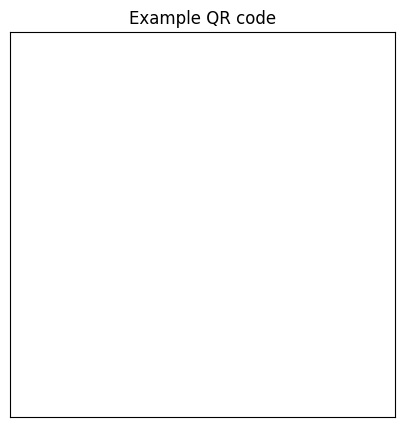

In [559]:
#1#imporing image and making it black and white // and ploting it
img = cv2.imread("../Phase 1 Files/FixedTC/13.png", cv2.IMREAD_GRAYSCALE)
_, img = cv2.threshold(img, 128, 255, cv2.THRESH_BINARY)
fig = plt.figure(figsize=(5, 5));
plt.xticks([], []);
plt.yticks([], []);
plt.title('Example QR code')
plt.imshow(img, cmap='gray');

#2#reading queit zone // reading where is the white part that surrounds QR code and indicating the boundaries of the QR code
start_row = -1
start_col = -1
end_row = -1
end_col = -1

for row_index, row in enumerate(img):
    for pixel in row:
        if pixel != 255:
            start_row = row_index
            break
    if start_row != -1:
        break

for row_index, row in enumerate(img[::-1]):
    for pixel in row:
        if pixel != 255:
            end_row = img.shape[0] - row_index
            break
    if end_row != -1:
        break

for col_index, col in enumerate(cv2.transpose(img)):
    for pixel in col:
        if pixel != 255:
            start_col = col_index
            break
    if start_col != -1:
        break

for col_index, col in enumerate(cv2.transpose(img)[::-1]):
    for pixel in col:
        if pixel != 255:
            end_col = img.shape[1] - col_index
            break
    if end_col != -1:
        break


print("boundaries of QR code are:", start_row, end_row, start_col, end_col)

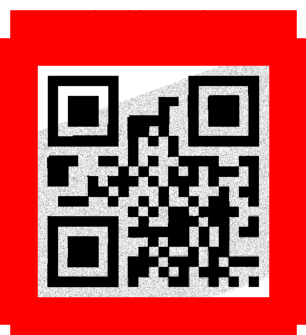

In [ ]:

#3#taking the indicated boundaries of the QR code plotting it, removing all white space surrounding it
qr_no_quiet_zone = img[start_row:end_row, start_col:end_col]
fig = plt.figure(figsize=(3, 3));
plt.xticks([], []);
plt.yticks([], []);
fig.get_axes()[0].spines[:].set_color('red');
fig.get_axes()[0].spines[:].set_linewidth(40);
fig.get_axes()[0].spines[:].set_position(("outward", 20))
plt.title('QR code without quiet zone', y = 1.15, color='red');
plt.imshow(qr_no_quiet_zone, cmap='gray');

Dimensions of the QR code without QZ: (1012, 1012)
Dimensions of the QR code after resizing: (21, 21)


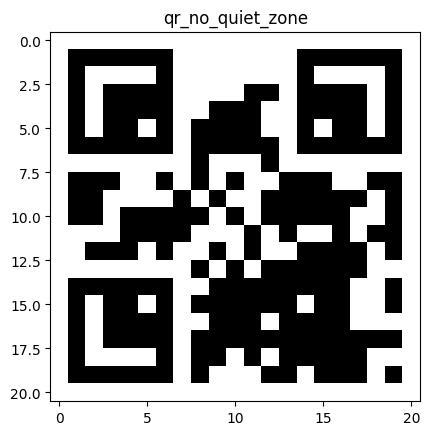

In [ ]:


# calculating dimensions of the QR code without the quiet zone (.shape get dimensions of the array)
print("Dimensions of the QR code without QZ:",qr_no_quiet_zone.shape)

grid_cells_num=21

#check if qr code dimensions without QZ is square , if not make it square
# newsize = max(qr_no_quiet_zone.shape[0], qr_no_quiet_zone.shape[1])
# #ensure that the new size is multiple of 21:
# newsize = grid_cells_num * np.ceil(newsize / grid_cells_num).astype(int)
# qr_no_quiet_zone = cv2.resize(qr_no_quiet_zone, (newsize, newsize))
# ut.showImage(qr_no_quiet_zone,title="qr_no_quiet_zone")
# print(qr_no_quiet_zone.shape)
#using this QR code version, the qr have 21 unique square in each dimension .. so we'll make grid of 21x21 cell

qr_no_quiet_zone = cv2.resize(qr_no_quiet_zone, (21, 21), interpolation=cv2.INTER_AREA)//128

print("Dimensions of the QR code after resizing:",qr_no_quiet_zone.shape)



qr_no_quiet_zone_inv = 1 - qr_no_quiet_zone
ut.showImage(qr_no_quiet_zone,title="qr_no_quiet_zone")


In [ ]:
# # plot the QR in small boxes each box framed in red frame
# _, axes = plt.subplots(21, 21, figsize=(5, 5))
# for i, row in enumerate(axes):
#     for j, col in enumerate(row):
#         col.imshow([[qr_no_quiet_zone[i][j]]], cmap="gray", vmin=0, vmax=1)
#         col.get_xaxis().set_visible(False)
#         col.get_yaxis().set_visible(False)
#         col.spines[:].set_color('red')

In [ ]:
#5#converting each grid cell to a numeric value such that / if common color white=1/ common color black =0
print(qr_no_quiet_zone_inv)

[[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 1 1 1 1 1 1 0 0 0 0 0 0 0 1 1 1 1 1 1 0]
 [0 1 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 1 0]
 [0 1 0 1 1 1 1 0 0 0 0 1 1 0 1 1 1 1 0 1 0]
 [0 1 0 1 1 1 1 0 0 1 1 1 0 0 1 1 1 1 0 1 0]
 [0 1 0 1 1 0 1 0 1 1 1 1 0 0 1 0 1 1 0 1 0]
 [0 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 0]
 [0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0]
 [0 1 1 1 0 0 1 0 1 0 1 0 0 1 1 1 0 0 1 1 0]
 [0 1 1 0 0 0 0 1 0 1 0 0 1 1 1 1 1 1 0 1 0]
 [0 1 1 0 1 1 1 1 1 0 1 0 1 1 1 1 1 0 0 1 0]
 [0 0 0 0 1 1 1 1 0 0 0 1 0 1 0 0 1 0 1 1 0]
 [0 0 1 1 1 0 1 0 0 1 0 1 0 0 1 1 1 1 0 1 0]
 [0 0 0 0 0 0 0 0 1 0 1 0 1 1 1 1 1 1 0 0 0]
 [0 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 0 0 1 0]
 [0 1 0 1 1 0 1 0 1 1 1 1 1 1 0 1 1 0 0 1 0]
 [0 1 0 1 1 1 1 0 0 1 1 1 0 1 1 1 1 0 0 0 0]
 [0 1 0 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0]
 [0 1 0 0 0 0 1 0 1 1 0 1 0 1 1 1 1 1 0 0 0]
 [0 1 1 1 1 1 1 0 1 0 0 0 1 1 0 1 1 1 0 1 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]]


In [ ]:

#INFORMATION EXTRACTION
#NOTEE: the QR code and our map have opposite ideas of what's black and what's white.
# So, we flip the bits (change 0 to 1 and 1 to 0) to make them match the real QR code

#6 . inspecting 8th row
#checking first 2 bits QR to indicate the error recovery level of the QR code
# We want row #8

# The first two bits determine the error correction level
# Level L (Low)         [11]	7%  of data bytes can be restored.
# Level M (Medium)      [10]	15% of data bytes can be restored.
# Level Q (Quartile)    [01]	25% of data bytes can be restored.
# Level H (High)        [00]	30% of data bytes can be restored.
ecl = qr_no_quiet_zone_inv[8, 0:2]
# Why "not"? Because the standard uses '1's for black and '0's for white
#
# "A dark module is a binary one and a light module is a binary zero."
#  - ISO/IEC 18004:2000(E)
#
# In image processing, we use them the other way.. Hence the inversion
print(ecl)


[0 1]


In [ ]:

#next 3 cells indicate mask used on the qr code
# Dictionary of all masks and their equivalent formulae
MASKS = {
    "000": lambda i, j: (i * j) % 2 + (i * j) % 3 == 0,
    "001": lambda i, j: (i / 2 + j / 3) % 2 == 0,
    "010": lambda i, j: ((i * j) % 3 + i + j) % 2 == 0,
    "011": lambda i, j: ((i * j) % 3 + i * j) % 2 == 0,
    "100": lambda i, j: i % 2 == 0,
    "101": lambda i, j: (i + j) % 2 == 0,
    "110": lambda i, j: (i + j) % 3 == 0,
    "111": lambda i, j: j % 3 == 0,
}

# the three cells after the ecl cells (converted to a string)
mask = qr_no_quiet_zone_inv[8, 2:5]
mask_str = ''.join([str(c) for c in mask])
print(mask_str)


110


In [ ]:


# # Same row as above, but we want cells #5 and #7 (#6 is always set to 0),
# #  followed by column #8 from cell #0 in it to cell #7 (and skipping #6)

# fec = [] #fec= Format Error Correction //list where we will collect some infor about QR
# #collect 5th and 7th cells in 8th row /and 8th column except 6th elements as it is always=1
# fec.append(qr_cells_numeric[8, 5])
# fec.append(qr_cells_numeric[8, 7])
# fec.extend(qr_cells_numeric[0:6, 8])
# fec.extend(qr_cells_numeric[7:9, 8])
# fec = [int(not(c)) for c in fec]
# print(fec)

In [ ]:
# # Let's cross-check with our example
# _, axes = plt.subplots(grid_cells_num, grid_cells_num, figsize=(5, 5))
# for i, row in enumerate(axes):
#     for j, col in enumerate(row):

#         col.get_xaxis().set_visible(False)
#         col.get_yaxis().set_visible(False)
#         if (i == 8 and j <= 8) or (i <= 8 and j == 8):
#             if (i != 6) and (j != 6):
#                 col.imshow(qr_no_quiet_zone[i][j], cmap="gray", vmin=0, vmax=255)
#                 col.spines[:].set_color('red')
#                 continue
#         col.imshow(qr_no_quiet_zone[i][j], cmap="gray", vmin=-1275, vmax=510)

In [ ]:
# Before we proceed, let's write a function for masking to make our lives easier
UP8, UP4, DOWN8, DOWN4, CW8, CCW8 = range(6)
block_starting_indices = [
    [21-7,  21-1,  UP8],
    [21-11, 21-1,  CCW8],
    [21-10, 21-3,  DOWN8],
    [21-6,  21-3,  DOWN8],
    [21-2,  21-3,  CW8],
    [21-3,  21-5,  UP8],
    [21-7,  21-5,  UP8],
    [21-11, 21-5,  CCW8],
    [21-10, 21-7,  DOWN8],
    [21-6,  21-7,  DOWN8],
    [21-2,  21-7,  CW8],
    [21-3,  21-9,  UP8],
    [21-7,  21-9,  UP8],
    [21-11, 21-9,  UP8],
    [21-16, 21-9,  UP8],
    [21-20, 21-9,  CCW8],
    [21-19, 21-11, DOWN8],
    [21-14, 21-11, DOWN4],  # Special 4-byte block, reserved for END (if exists!)
    [21-12, 21-11, DOWN8],
    [21-8,  21-11, DOWN8],
    [21-4,  21-11, DOWN8],
    [21-9,  21-13, UP8],
    [21-12, 21-16, DOWN8],
    [21-9,  21-18, UP8],
    [21-12, 21-20, DOWN8],
]


In [ ]:


# A more general apply_mask function (still works the same way)
def apply_mask_general(data_start_i, data_start_j, data, mask, direction):
    result = []
    row_offsets = []
    col_offsets = []
    mask_str = ''.join([str(c) for c in mask])
    if (direction in [UP8, UP4]):
        row_offsets = [0,  0, -1, -1, -2, -2, -3, -3]
        col_offsets = [0, -1,  0, -1,  0, -1,  0, -1]
    if (direction in [DOWN8, DOWN4]):
        row_offsets = [0,  0,  1,  1,  2,  2,  3,  3]
        col_offsets = [0, -1,  0, -1,  0, -1,  0, -1]
    if (direction == CW8):
        row_offsets = [0,  0,  1,  1,  1,  1,  0,  0]
        col_offsets = [0, -1,  0, -1, -2, -3, -2, -3]
    if (direction == CCW8):
        row_offsets = [0,  0, -1, -1, -1, -1,  0,  0]
        col_offsets = [0, -1,  0, -1, -2, -3, -2, -3]
    for i, j in zip(row_offsets, col_offsets):
        cell_bit = bool(data[data_start_i+i, data_start_j+j])
        mask_bit = MASKS[mask_str](data_start_i+i, data_start_j+j)
        # Modules corresponding to the dark areas of the mask are inverted.
        result.append(int(not cell_bit if mask_bit else cell_bit))
    return result[:4] if direction in [UP4, DOWN4] else result

In [ ]:
ecl = qr_no_quiet_zone_inv[8, 0:2]
mask = qr_no_quiet_zone_inv[8, 2:5]
enc_bits = apply_mask_general(21-1, 21-1, qr_no_quiet_zone_inv, mask, UP4)
# 0001	Numeric encoding (10 bits per 3 digits)
# 0010	Alphanumeric encoding (11 bits per 2 characters)
# 0100	Byte encoding (8 bits per character)
# 1000	Kanji encoding (13 bits per character)
# ...
len_bits = apply_mask_general(21-3, 21-1, qr_no_quiet_zone_inv, mask, UP8)
len_int = int(''.join([str(bit) for bit in len_bits]), 2)
print(f'ECL = {ecl}\nMASK = {mask}\nENC = {enc_bits}\nLEN = {len_bits} = {len_int} data symbols, each consisting of 8 bits')

ECL = [0 1]
MASK = [1 1 0]
ENC = [0, 1, 1, 1]
LEN = [0, 0, 0, 0, 1, 0, 0, 1] = 9 data symbols, each consisting of 8 bits


In [ ]:
message_bits = []
message_bits.extend(enc_bits)
message_bits.extend(len_bits)
# Let me re-format this for better readability :)
# First, let's read the data bytes, starting from the very first byte after enc and len
byte_index = 0
for _ in range(len_int):
    start_i, start_j, dir = block_starting_indices[byte_index]
    bits = apply_mask_general(start_i, start_j, qr_no_quiet_zone_inv, mask, dir)
    message_bits.extend(bits)
    bit_string = ''.join([str(bit) for bit in bits])
    alpha_char = chr(int(bit_string, 2))
    print(f'{bit_string} (={int(bit_string, 2):03d}) = {alpha_char}')
    byte_index += 1

00100100 (=036) = $
11011101 (=221) = Ý
10110000 (=176) = °
10011111 (=159) = 
00001011 (=011) = 
10011110 (=158) = 
01111000 (=120) = x
11101101 (=237) = í
00100110 (=038) = &


In [ ]:
# After finishing all the characters, the next 4 bits are expected to be '0000'
start_i, start_j, dir = block_starting_indices[byte_index]
bits = apply_mask_general(start_i, start_j, qr_no_quiet_zone_inv, mask, dir)
message_bits.extend(bits)
bit_string = ''.join([str(bit) for bit in bits])
print(f'{bit_string} (=END) -- the NULL TERMINATOR, followed by padding and/or ECC')
byte_index += 1

01011011 (=END) -- the NULL TERMINATOR, followed by padding and/or ECC


In [ ]:
# Let's see what the bytes that follow look like
# There supposedly remain 25-len-1 bytes to be read
for _ in range(25 - len_int - 1):
    start_i, start_j, dir = block_starting_indices[byte_index]
    bits = apply_mask_general(start_i, start_j, qr_no_quiet_zone_inv, mask, dir)
    message_bits.extend(bits)
    bit_string = ''.join([str(bit) for bit in bits])
    alpha_char = chr(int(bit_string, 2))
    print(f'{bit_string} (={int(bit_string, 2):03d}) = {alpha_char}')
    byte_index += 1

11010011 (=211) = Ó
11110001 (=241) = ñ
11111101 (=253) = ý
11000011 (=195) = Ã
01000100 (=068) = D
01100100 (=100) = d
10011101 (=157) = 
0000 (=000) =  
00101000 (=040) = (
10011011 (=155) = 
01000010 (=066) = B
00000101 (=005) = 
00011001 (=025) = 
01000011 (=067) = C
11101001 (=233) = é


### Reed Solom

In [ ]:
# For every 8 bits in the extracted message, convert to a byte
message_bytes = [int("".join(map(str, message_bits[i:i+8])), 2) for i in range(0, len(message_bits), 8)]

# Create the Reed-Solomon Codec for 7 ECC symbols (again, this is L)
rsc = rs.RSCodec(nsym=7)

# Decode the bytes with the 7-ECC RS Codec
message_decoded = rsc.decode(message_bytes)
rsc.maxerrata(verbose=True)

# In order to extract the actual data, need to convert back to bits
# Then take as many bytes as indicated by the message length indicator
# That is AFTER removing the first 12 bytes (of enc and len)
data_bits = bin(int.from_bytes(message_decoded[0], byteorder='big'))[13:13+len_int*8]

# Now convert back to bytes and print it lol
data_bytes = int(data_bits, 2).to_bytes((len(data_bits)+7)//8, 'big')
print(f'Data in message = "{data_bytes.decode(encoding="iso-8859-1")}"')
print(f'Data should be... "01-Good job!"')

ReedSolomonError: Too many errors to correct